In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print (with_mask_files [0:5])
print (with_mask_files[-5:])

['with_mask_3357.jpg', 'with_mask_128.jpg', 'with_mask_1671.jpg', 'with_mask_885.jpg', 'with_mask_383.jpg']
['with_mask_3332.jpg', 'with_mask_3479.jpg', 'with_mask_821.jpg', 'with_mask_121.jpg', 'with_mask_2616.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print (without_mask_files [0:5])
print (without_mask_files[-5:])

['without_mask_2793.jpg', 'without_mask_381.jpg', 'without_mask_2688.jpg', 'without_mask_3397.jpg', 'without_mask_1544.jpg']
['without_mask_478.jpg', 'without_mask_3575.jpg', 'without_mask_3675.jpg', 'without_mask_1408.jpg', 'without_mask_2979.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


creating **labels**

In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

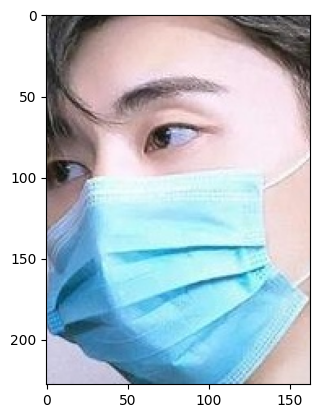

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

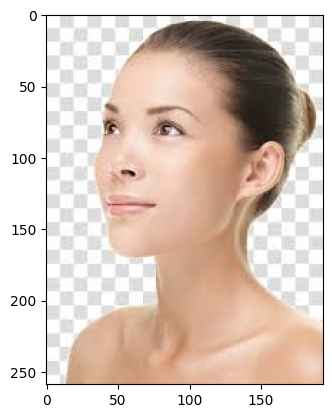

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing
1. Resize the Images
2.Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 43,  34,  29],
        [ 43,  34,  29],
        [ 44,  35,  29],
        ...,
        [ 27,  36,  33],
        [ 26,  34,  34],
        [ 26,  34,  36]],

       [[ 50,  41,  37],
        [ 50,  41,  37],
        [ 50,  41,  37],
        ...,
        [ 27,  36,  33],
        [ 27,  36,  33],
        [ 27,  35,  34]],

       [[ 60,  52,  51],
        [ 58,  53,  51],
        [ 59,  53,  50],
        ...,
        [ 28,  37,  34],
        [ 26,  35,  32],
        [ 27,  36,  35]],

       ...,

       [[182, 199, 216],
        [184, 200, 217],
        [185, 202, 218],
        ...,
        [ 28,  37,  53],
        [ 68,  66,  68],
        [114, 106,  91]],

       [[179, 196, 215],
        [179, 198, 215],
        [180, 199, 215],
        ...,
        [ 33,  41,  58],
        [ 72,  68,  69],
        [112, 103,  89]],

       [[174, 194, 212],
        [175, 196, 213],
        [176, 197, 214],
        ...,
        [ 33,  40,  57],
        [ 74,  70,  71],
        [113, 103,  90]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.5153 - acc: 0.7811 - val_loss: 0.3063 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3158 - acc: 0.8707 - val_loss: 0.2394 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 21ms/step - loss: 0.2606 - acc: 0.8970 - val_loss: 0.1997 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2282 - acc: 0.9099 - val_loss: 0.1830 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2117 - acc: 0.9159 - val_loss: 0.1910 - val_acc: 0.9124


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2126 - acc: 0.9206
Test Accuracy = 0.9205824136734009


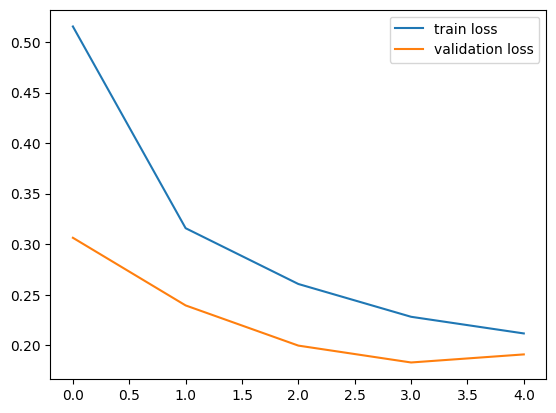

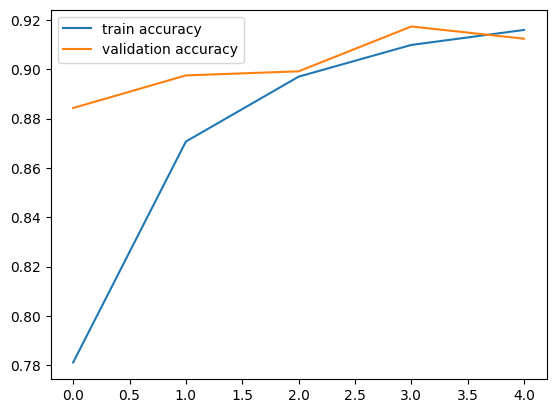

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/download.jpeg


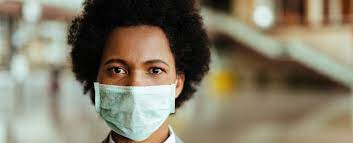

1/1 [==============================] - 0s 195ms/step
[[0.41670167 0.6464547 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/download (1).jpeg


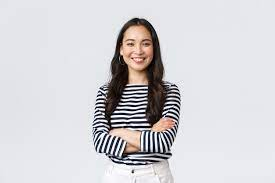

1/1 [==============================] - 0s 20ms/step
[[0.47147492 0.56429714]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')